<a href="https://colab.research.google.com/github/ofer2k/ML/blob/master/tfSignal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [0]:
N=100_000
signal_len=128

In [0]:
noise=tf.random.normal([N,signal_len])

In [0]:
f=0.5*tf.random.uniform([N,1])

In [0]:
t=tf.range(0,signal_len,dtype=tf.float32)

In [0]:
t=tf.reshape(t,[1,-1])

In [0]:
s=tf.sin(2*3.1415*t*f)+noise

In [0]:
psd=tf.abs(tf.signal.rfft(s))

In [9]:
psd.shape

TensorShape([100000, 65])

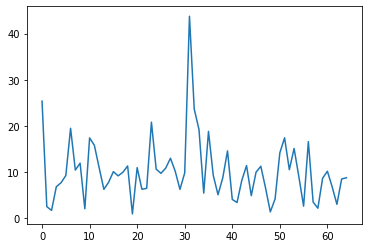

In [10]:
plt.plot(psd.numpy()[0,:])

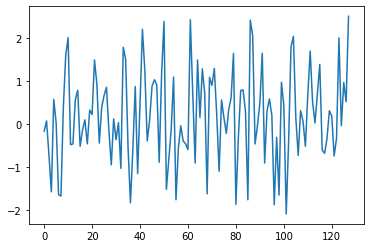

In [11]:
plt.plot(s.numpy()[0,:])

In [0]:
from tensorflow import keras

In [0]:
net_in=keras.layers.Input([signal_len,1])
L1=keras.layers.Conv1D(128,5)(net_in)
L1=keras.layers.Conv1D(32,3)(L1)
L1=keras.layers.Flatten()(L1)
L1=keras.layers.Dense(512,'relu')(L1)
L1=keras.layers.Dense(32,'relu')(L1)
L1=keras.layers.Dense(1)(L1)

In [0]:
model=keras.Model(inputs=net_in,outputs=L1)

In [0]:
optimizer = keras.optimizers.RMSprop(0.001)


In [0]:
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])


In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 124, 128)          768       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 122, 32)           12320     
_________________________________________________________________
flatten (Flatten)            (None, 3904)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1999360   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33    

In [0]:
s=tf.reshape(s,[N,signal_len,1])

Epoch 1/20
800/800 [==============================] - 66s 83ms/step - loss: 3.5937e-04 - mae: 0.0088 - mse: 3.5937e-04 - val_loss: 3.9755e-04 - val_mae: 0.0086 - val_mse: 3.9755e-04
Epoch 2/20
800/800 [==============================] - 66s 82ms/step - loss: 3.6634e-04 - mae: 0.0090 - mse: 3.6634e-04 - val_loss: 4.3723e-04 - val_mae: 0.0087 - val_mse: 4.3723e-04
Epoch 3/20
800/800 [==============================] - 72s 89ms/step - loss: 3.4862e-04 - mae: 0.0089 - mse: 3.4862e-04 - val_loss: 4.6482e-04 - val_mae: 0.0087 - val_mse: 4.6482e-04
Epoch 4/20
800/800 [==============================] - 66s 82ms/step - loss: 3.4845e-04 - mae: 0.0088 - mse: 3.4845e-04 - val_loss: 4.1804e-04 - val_mae: 0.0083 - val_mse: 4.1804e-04
Epoch 5/20
800/800 [==============================] - 66s 83ms/step - loss: 3.5768e-04 - mae: 0.0087 - mse: 3.5768e-04 - val_loss: 4.5665e-04 - val_mae: 0.0103 - val_mse: 4.5665e-04
Epoch 6/20
800/800 [==============================] - 66s 83ms/step - loss: 3.6668e-04 - m

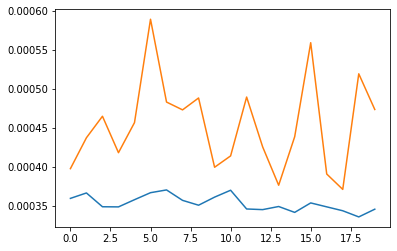

In [22]:
h=model.fit(s,f,batch_size=100,epochs=20,validation_split=0.2)
plt.plot(h.history['mse'])
plt.plot(h.history['val_mse'])